In [26]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import seaborn as sns

In [27]:
df = pd.read_csv('../01-data-collection/twitter_scrape.csv',index_col=0)
df.head()

,id,text,geo,description,likes,retweet_counts,lang
0,1575219410159403009,RT @GMaabe: They Wanted My Girl Chomzy To Shy ...,NaN,Your worst nightmare.,0,6,en
1,1575219406581694466,@foodbad69 i have always been bullied and sexu...,it/its she/her ★ brown ★ 20,vegetal is yum 🍅🍆🥦,0,0,en
2,1575219405834723328,RT @homunculusdick: My cousin in Trinidad won’...,Jamaica,🍃,0,424,en
3,1575219369084211201,@CarlaBabbVOA @JimFraserUk Escalation (idea fr...,huichin awwašte,Ohlone vegan feminist cat rescuer. My caring k...,0,0,en
4,1575219365321928704,RT @SamCaoOhio: Ohio's GOP-led government gasl...,"Katy,Texas,USA",I am a mailman who loves Los Toros and Formula...,0,76,en


In [28]:
df.loc[:,'retweet'] = df.text.str.contains('RT')

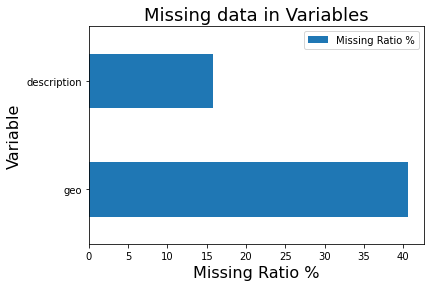

In [35]:
def plot_nas(trainData: pd.DataFrame):
    if trainData.isnull().sum().sum() != 0:
        na_df = (trainData.isnull().sum() / len(trainData)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.title('Missing data in Variables',fontsize=18)
        plt.xlabel('Missing Ratio %',fontsize=16)
        plt.ylabel('Variable',fontsize=16)
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

In [5]:
df.drop('geo',axis=1,inplace=True)

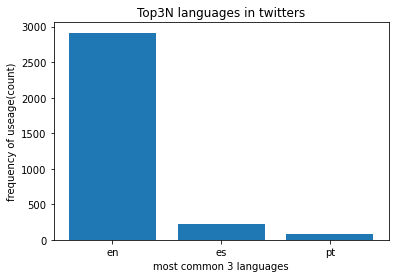

In [37]:
from collections import Counter
counter = Counter(df.lang.tolist())
common_language = counter.most_common(3)
common_language
x = []
y = []
for i in common_language:
    lang,num = i[0],i[1]
    x.append(lang)
    y.append(num)
fig = plt.figure()
ax = plt.axes()
ax.bar(x,height=y)
ax.set(xlabel='most common 3 languages',ylabel='frequency of useage(count)',title='Top3N languages in twitters')
plt.savefig('./language.png')
plt.show()

In [10]:
df.describe()

,id,likes,retweet_counts
count,3.369000e+03,3369.000000,3369.000000
mean,1.574130e+18,1.696349,428.709706
std,1.415388e+15,24.587985,2077.987547
min,1.572099e+18,0.000000,0.000000
25%,1.572261e+18,0.000000,0.000000
50%,1.575189e+18,0.000000,2.000000
75%,1.575202e+18,0.000000,166.000000
max,1.575219e+18,1242.000000,43454.000000


we can see that 1th percentile equales to 3th percentile of this dataset, which means that the data on the right side of the line in the plot are all outliers. This is the case for both the likes distribution and retweet distribution

[Text(0, 0.5, 'count'),
 Text(0.5, 1.0, 'The distribution of Likes'),
 Text(0.5, 0, 'likes(number)')]

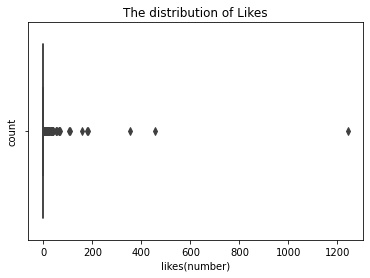

In [43]:
sns.boxplot(data=df,x = 'likes').set(ylabel='count',title='The distribution of Likes',xlabel='likes(number)')

[Text(0, 0.5, 'count'),
 Text(0.5, 1.0, 'The distribution of retweet_counts'),
 Text(0.5, 0, 'retweet_counts(number)')]

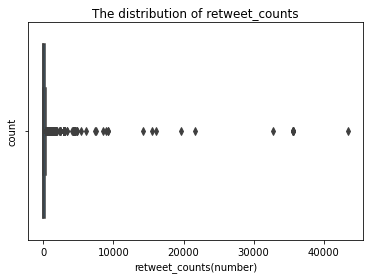

In [42]:
sns.boxplot(data=df,x = 'retweet_counts').set(ylabel='count',title='The distribution of retweet_counts',xlabel='retweet_counts(number)')

In [13]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('English')
def pipeline(input:str):
    str_input = re.sub(pattern=r'[^a-zA-z]',repl=' ',string=input)
#     str_output = correct_sentence_spelling(sentence = str_input)
    token_list = word_tokenize(str_input)
    token_list = [lemmatizer.lemmatize(i) for i in token_list]
    word_list = [word for word in token_list if word not in stopwords]
    word_str = ' '.join(word_list)
    return word_str
df_t = df[~df.text.str.contains('RT')].copy()
df_t.text = df_t.text.apply(pipeline)
df_t.loc[:,'length'] = df_t.text.apply(lambda x:len(x))

[Text(0.5, 1.0, 'The Distribution of Text Length of tweets'),
 Text(0, 0.5, 'Count (number)'),
 Text(0.5, 0, 'length (words)')]

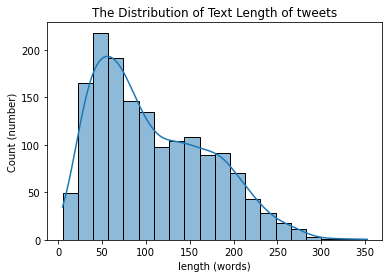

In [45]:
sns.histplot(data=df_t,x='length',kde=True).set(title='The Distribution of Text Length of tweets',ylabel='Count (number)',xlabel='length (words)')

In [18]:
df_public = pd.read_csv('../../data/clean_public.csv',index_col=0)

In [19]:
df_public.loc[:,'length'] = df_public['full_text'].apply(lambda x:len(x))

[Text(0.5, 1.0, 'Text Length Contrast Between Labels'),
 Text(0, 0.5, 'Count (number)'),
 Text(0.5, 0, 'length (words)')]

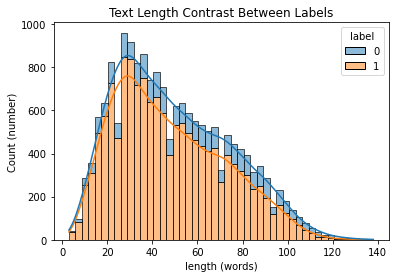

In [46]:
sns.histplot(data=df_public,x='length',kde=True,hue='label',multiple='stack').set(title='Text Length Contrast Between Labels',ylabel='Count (number)',xlabel='length (words)')

In [21]:
content = ','.join(df_public.full_text.tolist())

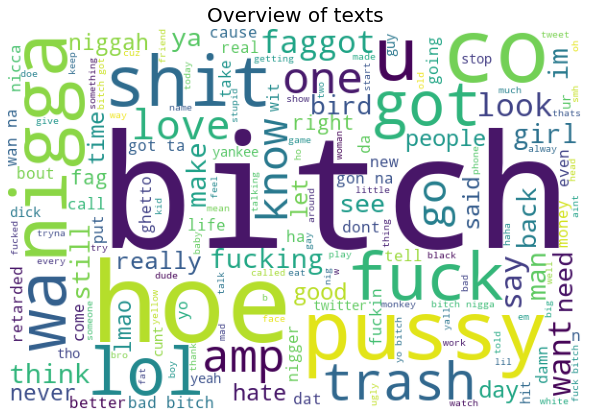

In [23]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 600, height = 400,
                background_color ='white',
                stopwords = stopwords,
                prefer_horizontal=0.5,
                min_font_size = 10).generate(content)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title('Overview of texts',fontsize=20)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()